# SIMPLE CORRELATION

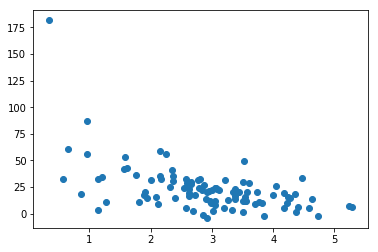

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)

pages = np.random.normal(3,1,100)
purchases = np.random.normal(50,30,100)/pages
plt.scatter(pages,purchases)


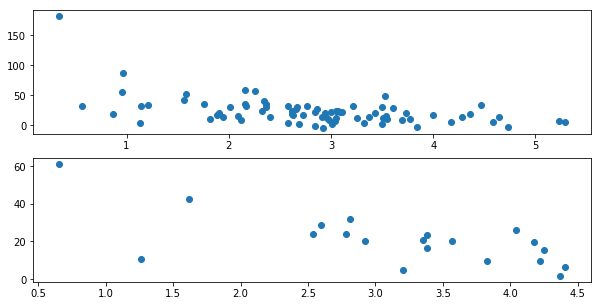

In [12]:
trainX = pages[:80]
testX = pages[80:]

trainY = purchases[:80]
testY = purchases[80:]

nrows = 2
ncols = 1
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(nrows, ncols, 1)
ax.scatter(trainX,trainY)
ax = fig.add_subplot(nrows, ncols, 2)
ax.scatter(testX,testY)

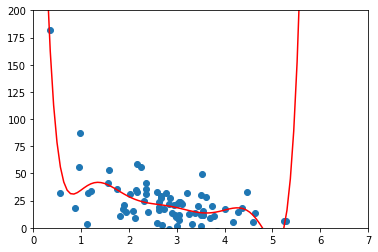

In [23]:
x = trainX
y = trainY
fp = np.poly1d(np.polyfit(x,y,8))

xp = np.linspace(0,7,100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(x,y)
plt.plot(xp,fp(xp),c="r")
plt.show()

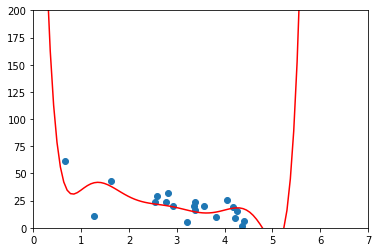

In [24]:
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(testX,testY)
plt.plot(xp,fp(xp),c="r")
plt.show()

In [25]:
from sklearn.metrics import r2_score

r2_train = r2_score(trainY,fp(trainX))
r2_test = r2_score(testY,fp(testX))

In [26]:
print("R2 di training: " + str(round(r2_train,2)))
print("R2 di testing: " + str(round(r2_test,2)))

R2 di training: 0.64
R2 di testing: 0.3


In [37]:
import pandas as pd
simulation = pd.DataFrame(columns=['Order','R2Train','R2Test'])

for i in range(1,15):
    fp = np.poly1d(np.polyfit(x,y,i))
    r2_train = r2_score(trainY,fp(trainX))
    r2_test = r2_score(testY,fp(testX))
    row = {
        'Order': int(i),
        'R2Train': round(r2_train,2),
        'R2Test': round(r2_test,2)
    }
    simulation = simulation.append(row,ignore_index=True)
print(simulation)

    Order  R2Train  R2Test
0     1.0     0.26    0.42
1     2.0     0.36    0.29
2     3.0     0.43    0.27
3     4.0     0.48    0.39
4     5.0     0.55    0.50
5     6.0     0.60    0.61
6     7.0     0.62    0.55
7     8.0     0.64    0.30
8     9.0     0.66    0.22
9    10.0     0.68    0.22
10   11.0     0.69    0.27
11   12.0     0.69    0.06
12   13.0     0.71    0.23
13   14.0     0.71    0.29


# NAIVE BAYESIAN